In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# helper functions
def draw(x1,x2):
    ln = plt.plot(x1,x2)
    
def sigmoid(s):
    return 1/(1+np.exp(-s))
    
def cross_entropy(line_params,points,y):
    m = points.shape[0]
    p = sigmoid(points*line_params)
    return -(1/m)*(np.log(p).T*y + np.log(1-p).T*(1-y))

def gradient_descent(line_params,points,y,alpha):
    for i in range(1000): #epochs
        m = points.shape[0]
        p = sigmoid(points*line_params)
        grad = (1/m)*(points.T*(p-y))
        line_params -= grad*alpha
        
        # update parameters
        w1,w2,b = line_params.item(0),line_params.item(1),line_params.item(2)
        x1 = np.array([points[:,0].min(),points[:,0].max()])  
        x2 = -b/w2 + x1*(-w1/w2)

    draw(x1,x2)
    

In [77]:
n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)

# create values across a gaussian dist (pick x1 and x2 mids)
# get transpose (you have x1,x2 vals)
top_region = np.array([np.random.normal(10,2,n_pts),
                       np.random.normal(12,2,n_pts),bias]).T
bot_region = np.array([np.random.normal(5,2,n_pts),
                       np.random.normal(6,2,n_pts),bias]).T
# combine them
all_pts = np.vstack((top_region,bot_region))

# line parameters (vertical)
line_params = np.matrix(np.zeros(3)).T

# create labels (vertical)
y = np.array([np.zeros(n_pts),np.ones(n_pts)]).reshape(n_pts*2,1)

# calculate error (cross entropy)
cross = cross_entropy(line_params,all_pts,y)

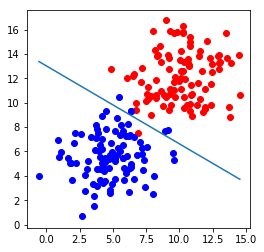

In [78]:
# plot
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0],top_region[:,1],color='r')
ax.scatter(bot_region[:,0],bot_region[:,1],color='b')
gradient_descent(line_params,all_pts,y,0.1)
plt.show()